In [3]:
import pandas as pd

In [4]:
df34_old = pd.read_csv('to_analyze34.csv')

In [5]:
# Define the features to keep
features_to_keep = ['is_billboard', 'liveness', 'acousticness', 'energy', 'speechiness', 'label']

# Drop all features except the ones to keep
df34_clean = df34_old[features_to_keep]

df34_clean

,is_billboard,liveness,acousticness,energy,speechiness,label
0,False,0.1130,0.4010,0.5730,0.0544,1
1,False,0.2720,0.2210,0.7220,0.0369,1
2,False,0.0936,0.0112,0.7650,0.0993,1
3,False,0.0824,0.0194,0.4540,0.3750,1
4,False,0.0931,0.4680,0.8020,0.0878,1
...,...,...,...,...,...,...
170648,False,0.0979,0.9920,0.0082,0.0350,0
170649,False,0.1050,0.1530,0.1760,0.9120,0
170650,False,0.2740,0.9770,0.2540,0.1200,0
170651,False,0.1070,0.1610,0.2380,0.9130,0


In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into features (X) and target variable (y)
X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the training data
knn.fit(X_train, y_train)

# Predict the labels for the training set
y_train_pred = knn.predict(X_train)

# Predict the labels for the test set
y_test_pred = knn.predict(X_test)

# Calculate the accuracy of the model for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate the accuracy of the model for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Calculate precision, recall, and F1 score for the test set
precision = precision_score(y_test, y_test_pred)
print("Precision: ", precision)
recall = recall_score(y_test, y_test_pred)
print("Recall: ", recall)
f1 = f1_score(y_test, y_test_pred)
print("F1: ", f1)

# Calculate the overall accuracy of the model
accuracy = accuracy_score(y_test, y_test_pred)
print("Model Accuracy:", accuracy)


Training Accuracy: 0.8023249000161147
Test Accuracy: 0.7155664938032873
Precision:  0.7045429301343996
Recall:  0.7430010542345086
F1:  0.7232611174458381
Model Accuracy: 0.7155664938032873


In [7]:
#tuned Knn
# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

# Create a KNN classifier
knn_tuned = KNeighborsClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(knn_tuned, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new KNN classifier with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params)

# Fit the model to the training data
best_knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = best_knn.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy_tuned = accuracy_score(y_test, y_pred)
precision_tuned = precision_score(y_test, y_pred)
recall_tuned = recall_score(y_test, y_pred)
f1_tuned = f1_score(y_test, y_pred)

# Print the results for the tuned model
print("Tuned KNN Model:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1 Score:", f1_tuned)

Tuned KNN Model:
Accuracy: 0.7251765257390642
Precision: 0.7125649243010277
Recall: 0.7553004568349537
F1 Score: 0.7333105879677015


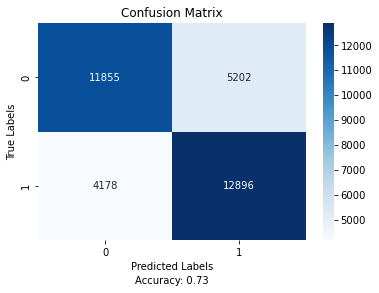

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict the labels for the test set
y_pred = best_knn.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Add labels, title, and axis ticks
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

accuracy = accuracy_score(y_test, y_pred)
plt.text(0.5, -0.2, f"Accuracy: {accuracy:.2f}", ha='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()



In [9]:
#LogisticRegression 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into features (X) and target variable (y)
X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logreg = LogisticRegression()

# Fit the Logistic Regression model to the training data
logreg.fit(X_train, y_train)

# Predict the labels for the training set
y_train_pred = logreg.predict(X_train)

# Predict the labels for the test set
y_test_pred = logreg.predict(X_test)

# Calculate the accuracy of the model for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate the accuracy of the model for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Calculate precision, recall, and F1 score for the test set
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Calculate the overall accuracy of the model
overall_accuracy = accuracy_score(y, logreg.predict(X))
print("Model Accuracy:", overall_accuracy)

# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Training Accuracy: 0.7407084572449861
Test Accuracy: 0.7398845624212592
Model Accuracy: 0.7405436763490827
Precision: 0.7455951096727795
Recall: 0.728651751200656
F1 Score: 0.7370260663507109


In [10]:
#tuned LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into features (X) and target variable (y)
X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logreg = LogisticRegression()

# Define the parameter grid
param_grid = {'C': [0.1, 1.0, 10.0],
              'penalty': ['l1', 'l2']}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new Logistic Regression classifier with the best hyperparameters
best_logreg = LogisticRegression(**best_params)

# Fit the model to the training data
best_logreg.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = best_logreg.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Tuned Logistic Regression Model:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


c:\Users\elits\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\elits\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\elits\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\elits\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

Tuned Logistic Regression Model:
Accuracy: 0.740236148955495
Precision: 0.7458662832494608
Recall: 0.7291788684549607
F1 Score: 0.7374281821951074


In [11]:
#decision tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separate the features and the target variable
X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6672233453458732
Precision: 0.6697351229362157
Recall: 0.660477919643903
F1 Score: 0.6650743099787687


In [12]:
#random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separate the features and the target variable
X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7410858164132313
Precision: 0.7271022883926109
Recall: 0.7722853461403303
F1 Score: 0.7490130364395466


In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

# Separate the features and the target variable
X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)  # Set the number of components to retain
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['auto']
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params)

# Fit the classifier to the training data
best_rf_classifier.fit(X_train_pca, y_train)

# Predict the labels for the test set
y_pred = best_rf_classifier.predict(X_test_pca)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)




Accuracy: 0.7108786733468108
Precision: 0.704437131184748
Recall: 0.7271289680215532
F1 Score: 0.7156032047956654
